# Plot parameters

In [1]:
plotpars = {'axes.labelsize': 18,
            'axes.linewidth': 1.,
            'figure.figsize': (7.,5.),
            'font.size': 20,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'best',
            'legend.fontsize': 12,
            'mathtext.fontset': 'stixsans',
            'savefig.bbox': 'tight',
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
           }

# Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from astropy.constants import c

# Data

For details in the fields, see SDSS DR16 Schema Browser for PhotoObjAll and Photoz

http://skyserver.sdss.org/dr16/en/help/browser/browser.aspx#&&history=description+PhotoObjAll+U

http://skyserver.sdss.org/dr16/en/help/browser/browser.aspx#&&history=description+Photoz+U

In [3]:
data_path = './../../Data/'

In [4]:
stripe01 = pd.read_csv(os.path.join(data_path, 'Stripe82_1half_01.csv'))

In [5]:
stripe02 = pd.read_csv(os.path.join(data_path, 'Stripe82_2half_01.csv'))

In [6]:
stripe82_all = pd.concat([stripe01, stripe02], ignore_index=True)

# Offsets

See Doi et al. 2010

In [7]:
offset_u = -0.04
offset_g = +0.01
offset_r = +0.01
offset_i = +0.01
offset_z = +0.02

# AB magnitudes

In [8]:
mag_ab_u = pd.DataFrame(stripe82_all['dered_u'] + stripe82_all['kcorrU'] + offset_u, columns=['mag_ab_u'])
mag_ab_g = pd.DataFrame(stripe82_all['dered_g'] + stripe82_all['kcorrG'] + offset_g, columns=['mag_ab_g'])
mag_ab_r = pd.DataFrame(stripe82_all['dered_r'] + stripe82_all['kcorrR'] + offset_r, columns=['mag_ab_r'])
mag_ab_i = pd.DataFrame(stripe82_all['dered_i'] + stripe82_all['kcorrI'] + offset_i, columns=['mag_ab_i'])
mag_ab_z = pd.DataFrame(stripe82_all['dered_z'] + stripe82_all['kcorrZ'] + offset_z, columns=['mag_ab_z'])

In [9]:
mags_ab = mag_ab_u.join([mag_ab_g, mag_ab_r, mag_ab_i, mag_ab_z])

In [10]:
stripe82_all = stripe82_all.join(mags_ab)

In [11]:
stripe82_all

,DR16_objID,specObjID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,modelMagErr_u,...,absMagZ,lumDist,nnAvgZ,nnObjID,nnSpecz,mag_ab_u,mag_ab_g,mag_ab_r,mag_ab_i,mag_ab_z
0,1237656567038084185,1150704931510970368,311.933374,-1.112837,21.04576,19.13633,18.24454,17.80636,17.49794,0.213636,...,-20.3617,405.7430,0.091076,1237679254671458424,0.087848,20.74498,18.98129,18.12617,17.60448,17.35054
1,1237656567039001739,1151796201734039552,314.018234,-1.127987,20.76806,19.62210,19.13410,18.80635,18.65836,0.139655,...,-19.4515,447.8940,0.098819,1237674460415066308,0.056180,20.23733,19.27104,18.89285,18.45722,18.42430
2,1237656567574954805,1105665360851396608,311.938698,-0.835999,20.45433,18.53984,17.59312,17.19148,16.80270,0.091158,...,-21.4032,425.1830,0.095755,1237667735064871170,0.121572,20.31114,18.46772,17.42584,17.03764,16.65656
3,1237656568111825115,1256543103012071424,311.928066,-0.237977,17.69172,16.47214,16.03583,15.88817,15.80522,0.011567,...,-18.4658,67.5777,0.019784,1237651190824960243,0.010717,17.32434,16.20703,15.86566,15.73882,15.70032
4,1237656568111826622,1150720049795852288,311.897271,-0.382674,21.86385,20.02797,19.47907,19.11540,18.81272,0.507493,...,-19.5642,423.3730,0.111239,1237663543685611936,0.067058,21.45083,19.75673,19.30473,18.81682,18.62357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21536,1237678437018828951,462857867016300544,45.378932,1.021455,19.63723,18.41523,17.84743,17.45326,17.25182,0.045510,...,-21.0927,445.9270,0.097447,1237661387615633723,0.103471,19.16071,18.10534,17.63430,17.15122,17.04182
21537,1237678437018894577,462858141894207488,45.420426,0.902750,19.67763,18.31304,17.75179,17.37725,17.12214,0.062890,...,-20.3582,299.7080,0.070572,1237678437018894577,0.073942,19.24202,18.00389,17.56485,17.10578,16.94978
21538,1237678617436029268,1757649652217309184,41.515569,0.925301,20.04137,18.96305,18.49113,18.19909,18.07179,0.073861,...,-20.1827,442.0680,0.099090,1237678596462019208,0.114081,19.83455,18.86331,18.42336,18.00507,17.94215
21539,1237678617973424341,460659394422532096,42.845240,1.148501,19.83836,17.73394,16.77602,16.33247,15.98942,0.060716,...,-21.7030,350.7490,0.080606,1237658614132310130,0.118846,19.73000,17.71565,16.66045,16.22319,15.89081


# Fluxes

Fluxes in erg cm$^{−2}$ s$^{−1}$ Hz$^{−1}$

In [12]:
wl_pivot_u = 3557
wl_pivot_g = 4702
wl_pivot_r = 6175
wl_pivot_i = 7491
wl_pivot_z = 8943

In [13]:
light_speed = c.to('m/s').value

below the wave

In [14]:
flux_u = light_speed/(wl_pivot_u*(10**9))**2 * 10**(-0.4*mag_ab_u.values+48.60)
flux_g = light_speed/(wl_pivot_g*(10**9))**2 * 10**(-0.4*mag_ab_g.values+48.60)
flux_r = light_speed/(wl_pivot_r*(10**9))**2 * 10**(-0.4*mag_ab_r.values+48.60)
flux_i = light_speed/(wl_pivot_i*(10**9))**2 * 10**(-0.4*mag_ab_i.values+48.60)
flux_z = light_speed/(wl_pivot_z*(10**9))**2 * 10**(-0.4*mag_ab_z.values+48.60)

In [15]:
fluxes = np.column_stack([flux_u, flux_g, flux_r, flux_i, flux_z])

In [16]:
fluxes = pd.DataFrame(fluxes, columns=['flux_u', 'flux_g', 'flux_r', 'flux_i', 'flux_z'])

In [17]:
# fluxes

In [18]:
stripe82_all = stripe82_all.join(fluxes)

In [19]:
# stripe82_all

# Signal-to-noise estimation and cut

In [20]:
s2n_mag_u = 1/stripe82_all['modelMagErr_u']
s2n_mag_g = 1/stripe82_all['modelMagErr_g']
s2n_mag_r = 1/stripe82_all['modelMagErr_r']
s2n_mag_i = 1/stripe82_all['modelMagErr_i']
s2n_mag_z = 1/stripe82_all['modelMagErr_z']

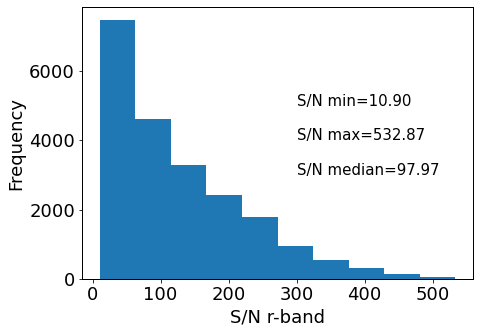

In [21]:
plt.rcParams.update(plotpars)
plt.hist(s2n_mag_r, bins=10)
plt.xlabel("S/N r-band")
plt.ylabel("Frequency")
# plt.yscale('log')
plt.text(300, 5000, "S/N min=%.2f" % s2n_mag_r.min(), fontsize=15)
plt.text(300, 4000, "S/N max=%.2f" % s2n_mag_r.max(), fontsize=15)
plt.text(300, 3000, "S/N median=%.2f" % s2n_mag_r.median(), fontsize=15)
plt.show()

In [22]:
s2n_mag_u_df = pd.DataFrame(1/stripe82_all['modelMagErr_u'].values, columns=['s2n_mag_u'])
s2n_mag_g_df = pd.DataFrame(1/stripe82_all['modelMagErr_g'].values, columns=['s2n_mag_g'])
s2n_mag_r_df = pd.DataFrame(1/stripe82_all['modelMagErr_r'].values, columns=['s2n_mag_r'])
s2n_mag_i_df = pd.DataFrame(1/stripe82_all['modelMagErr_i'].values, columns=['s2n_mag_i'])
s2n_mag_z_df = pd.DataFrame(1/stripe82_all['modelMagErr_z'].values, columns=['s2n_mag_z'])

In [23]:
s2n_all = s2n_mag_u_df.join([s2n_mag_g_df, s2n_mag_r_df, s2n_mag_i_df, s2n_mag_z_df])

In [24]:
stripe82_all = stripe82_all.join(s2n_all)

In [25]:
stripe82_all.to_csv('../../Data/stripe82_SDSS.csv', index=False)

In [26]:
stripe82_all

,DR16_objID,specObjID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,modelMagErr_u,...,flux_u,flux_g,flux_r,flux_i,flux_z,s2n_mag_u,s2n_mag_g,s2n_mag_r,s2n_mag_i,s2n_mag_z
0,1237656567038084185,1150704931510970368,311.933374,-1.112837,21.04576,19.13633,18.24454,17.80636,17.49794,0.213636,...,4.749643e+23,1.379556e+24,1.758243e+24,1.931742e+24,1.712530e+24,4.680863,49.120666,76.199475,77.070697,28.343016
1,1237656567039001739,1151796201734039552,314.018234,-1.127987,20.76806,19.62210,19.13410,18.80635,18.65836,0.139655,...,7.580904e+23,1.056427e+24,8.677743e+23,8.807509e+23,6.369924e+23,7.160523,40.547439,40.146116,39.986581,12.678494
2,1237656567574954805,1105665360851396608,311.938698,-0.835999,20.45433,18.53984,17.59312,17.19148,16.80270,0.091158,...,7.082669e+23,2.213948e+24,3.351280e+24,3.256005e+24,3.245116e+24,10.969931,103.068440,147.702895,148.212813,72.085684
3,1237656568111825115,1256543103012071424,311.928066,-0.237977,17.69172,16.47214,16.03583,15.88817,15.80522,0.011567,...,1.108963e+25,1.776002e+25,1.410207e+25,1.076994e+25,7.829360e+24,86.450299,250.006375,236.375829,219.470549,145.624805
4,1237656568111826622,1150720049795852288,311.897271,-0.382674,21.86385,20.02797,19.47907,19.11540,18.81272,0.507493,...,2.479254e+23,6.754037e+23,5.938199e+23,6.324309e+23,5.301835e+23,1.970469,23.084623,21.450371,21.004847,7.791991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21536,1237678437018828951,462857867016300544,45.378932,1.021455,19.63723,18.41523,17.84743,17.45326,17.25182,0.045510,...,2.043473e+24,3.091146e+24,2.765838e+24,2.932602e+24,2.275759e+24,21.973077,107.178368,133.771229,133.390531,53.975163
21537,1237678437018894577,462858141894207488,45.420426,0.902750,19.67763,18.31304,17.75179,17.37725,17.12214,0.062890,...,1.896029e+24,3.393903e+24,2.948538e+24,3.057941e+24,2.477093e+24,15.900675,95.303537,116.820396,113.997295,46.644141
21538,1237678617436029268,1757649652217309184,41.515569,0.925301,20.04137,18.96305,18.49113,18.19909,18.07179,0.073861,...,1.098583e+24,1.537912e+24,1.337220e+24,1.335713e+24,9.931029e+23,13.538877,54.683356,61.989939,56.414880,16.559027
21539,1237678617973424341,460659394422532096,42.845240,1.148501,19.83836,17.73394,16.77602,16.33247,15.98942,0.060716,...,1.209631e+24,4.425837e+24,6.782140e+24,6.893902e+24,6.569469e+24,16.470205,161.706377,222.349752,226.587763,121.137119


In [27]:
high_s2n_all = stripe82_all.loc[(s2n_mag_u>20) & (s2n_mag_g>50) & (s2n_mag_r>50) & (s2n_mag_i>50) & (s2n_mag_z>50)]

In [28]:
high_s2n_all

,DR16_objID,specObjID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,modelMagErr_u,...,flux_u,flux_g,flux_r,flux_i,flux_z,s2n_mag_u,s2n_mag_g,s2n_mag_r,s2n_mag_i,s2n_mag_z
3,1237656568111825115,1256543103012071424,311.928066,-0.237977,17.69172,16.47214,16.03583,15.88817,15.80522,0.011567,...,1.108963e+25,1.776002e+25,1.410207e+25,1.076994e+25,7.829360e+24,86.450299,250.006375,236.375829,219.470549,145.624805
9,1237656895066997215,1105766515921152000,311.945922,0.252411,18.92926,16.92672,15.97627,15.53135,15.15208,0.031804,...,3.347811e+24,1.085314e+25,1.533906e+25,1.520874e+25,1.468285e+25,31.442645,241.636128,293.225809,298.309243,157.496908
12,1237656896140738693,0,311.886715,1.245031,18.00170,16.20236,15.52765,15.31427,15.27560,0.012726,...,9.213252e+24,2.489038e+25,2.502181e+25,1.950945e+25,1.342661e+25,78.581571,286.532951,304.121269,299.734316,194.726722
16,1237663542602105740,1107958117070563328,314.038402,-0.497318,19.42958,17.47296,16.56512,16.14273,15.78741,0.043883,...,2.130792e+24,6.739621e+24,9.074251e+24,8.798023e+24,8.298474e+24,22.787665,181.368915,229.524888,228.974843,116.837103
17,1237663543138059153,1105675806211860480,311.914644,-0.171809,17.99765,16.75567,16.21939,15.89566,15.66420,0.024788,...,8.509597e+24,1.394426e+25,1.181035e+25,1.112974e+25,9.140506e+24,40.341776,215.094192,216.085677,194.156812,66.709183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21528,1237678617973686411,461719598610278400,43.410158,1.203353,18.20172,16.22911,15.36163,14.94751,14.63026,0.024373,...,6.403435e+24,2.022085e+25,2.603795e+25,2.507871e+25,2.296499e+25,41.028587,295.539627,363.597227,368.272309,220.268538
21531,1237645942906355807,0,59.012388,0.018260,19.44574,17.68412,16.87997,16.50182,16.28523,0.024378,...,6.464352e+24,1.344954e+25,1.157387e+25,9.416838e+24,6.933144e+24,41.020390,199.039792,228.390908,230.103735,128.036071
21535,1237666302169383100,1398491428027394048,57.590597,1.184344,19.43730,18.18862,17.60723,17.25635,17.00057,0.046604,...,4.124554e+24,5.997130e+24,4.528212e+24,4.090431e+24,3.205223e+24,21.457505,131.250924,150.573406,137.816143,54.263217
21536,1237678437018828951,462857867016300544,45.378932,1.021455,19.63723,18.41523,17.84743,17.45326,17.25182,0.045510,...,2.043473e+24,3.091146e+24,2.765838e+24,2.932602e+24,2.275759e+24,21.973077,107.178368,133.771229,133.390531,53.975163


In [29]:
high_s2n_all.to_csv('../../Data/Stripe82_highs2n.csv', index=False)

In [30]:
palette = ['#feedde','#fdbe85','#fd8d3c','#e6550d','#a63603']

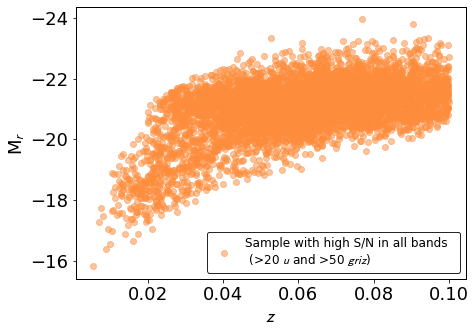

In [31]:
plt.rcParams.update(plotpars)
plt.plot(high_s2n_all['photoZ'], high_s2n_all['absMagR'], 'o', alpha=0.5, color=palette[2], 
         label='Sample with high S/N in all bands  \n (>20 $u$ and >50 $griz$)')
plt.legend(loc='best')
# plt.plot(stripe82_final['photoZ'].values[6], stripe82_final['absMagR'].values[6], 'o', alpha=1, color=palette[3])
plt.gca().invert_yaxis()
plt.ylabel("M$_r$")
plt.xlabel("$z$")
plt.savefig(os.path.join('../../Figures/', 'magr_redshift_uband20.png'))
plt.savefig(os.path.join('../../Figures/', 'magr_redshift_uband20.pdf'))
plt.show()

In [32]:
print(high_s2n_all['DR16_objID'].values.size)

5430


# Random checks

In [33]:
np.unique(stripe82_all['probability_star'].values)

array([0])

In [34]:
random_subsample = high_s2n_all.sample(n=10, random_state=17)

In [35]:
random_subsample

,DR16_objID,specObjID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,modelMagErr_u,...,flux_u,flux_g,flux_r,flux_i,flux_z,s2n_mag_u,s2n_mag_g,s2n_mag_r,s2n_mag_i,s2n_mag_z
12589,1237666339726360676,4758299113900232704,17.741942,0.276129,18.94442,17.23060,16.42061,16.04082,15.75666,0.029178,...,2.597102e+24,6.933738e+24,8.961460e+24,8.625040e+24,7.826115e+24,34.272432,221.721722,263.358671,264.675811,131.958693
17326,1237660339089899560,461663798395168768,43.777490,-0.162503,18.09515,16.16555,15.25187,14.80111,14.47798,0.020082,...,6.859950e+24,2.095055e+25,2.867020e+25,2.872216e+25,2.651247e+25,49.796308,306.502606,352.989681,350.411699,207.339443
17486,1237657071160590430,453912241318684672,30.771095,0.230166,18.85441,16.92876,16.05544,15.64002,15.30305,0.040280,...,2.778005e+24,9.053311e+24,1.258226e+25,1.257353e+25,1.198158e+25,24.826321,218.806459,271.782704,279.501760,127.770218
16959,1237663783677264019,458283074061363200,38.208904,-0.353272,17.99490,16.93716,16.49683,16.26670,16.09857,0.017781,...,6.739024e+24,9.866780e+24,8.107945e+24,7.120149e+24,5.672810e+24,56.239490,217.250186,223.629598,207.911706,87.170734
3218,1237663479255531995,1114782511252137984,325.949848,0.162529,20.08358,18.42121,17.86980,17.67765,17.48577,0.047990,...,1.042541e+24,2.664572e+24,2.593838e+24,2.057847e+24,1.671176e+24,20.837470,140.613454,151.476640,140.329350,54.477922
19565,1237666300558311492,0,56.563926,-0.177978,17.94274,16.70939,16.19450,15.97452,15.88270,0.011929,...,1.376705e+25,2.012517e+25,1.555245e+25,1.176395e+25,8.236188e+24,83.831221,258.998582,270.729852,256.528128,154.017184
15517,1237663785283551423,452770397184616448,28.338643,0.920746,18.45765,17.00467,16.35868,15.99123,15.73729,0.030314,...,4.196710e+24,8.653812e+24,9.011120e+24,9.335146e+24,8.022066e+24,32.988385,198.899687,236.868429,230.629381,103.171981
18129,1237666299480244328,463951063850969088,46.602389,-0.922652,19.12165,17.18627,16.20914,15.77596,15.42447,0.037114,...,2.427130e+24,7.727152e+24,1.201674e+25,1.201227e+25,1.156289e+25,26.944293,198.199005,276.949852,278.072148,145.680769
16883,1237666407918010524,453822081365207040,28.494870,-0.093534,18.71754,17.23089,16.49052,16.09945,15.83262,0.046198,...,3.210591e+24,6.965936e+24,8.300625e+24,8.540614e+24,7.537412e+24,21.646113,182.259382,215.523605,215.904380,82.811414
19006,1237666299480309940,462745991708174336,46.846803,-0.983505,18.50589,16.70998,15.87181,15.47069,15.16762,0.022788,...,4.526484e+24,1.260479e+25,1.612125e+25,1.549505e+25,1.408582e+25,43.882533,253.728541,316.613001,315.905161,174.953852


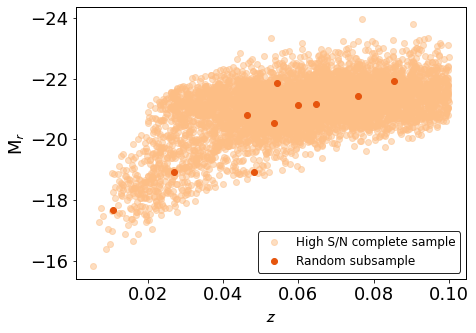

In [36]:
plt.rcParams.update(plotpars)
plt.plot(high_s2n_all['photoZ'], high_s2n_all['absMagR'], 'o', alpha=0.5, color=palette[1], 
         label='High S/N complete sample')
plt.plot(random_subsample['photoZ'], random_subsample['absMagR'], 'o', alpha=1, color=palette[3], 
         label='Random subsample')
plt.legend(loc='best')
# plt.plot(stripe82_final['photoZ'].values[6], stripe82_final['absMagR'].values[6], 'o', alpha=1, color=palette[3])
plt.gca().invert_yaxis()
plt.ylabel("M$_r$")
plt.xlabel("$z$")
# plt.savefig(os.path.join('../../Figures/', 'magr_redshift_uband20.png'))
# plt.savefig(os.path.join('../../Figures/', 'magr_redshift_uband20.pdf'))
plt.show()

In [37]:
random_subsample.to_csv('../../Data/Stripe82_highs2n_10subsample.csv')